# singscore


## 1. Install "singscore" R package

1. 从bioconductor安装:
> if (!requireNamespace("BiocManager", quietly=TRUE))<br>
> install.packages("BiocManager")<br>
> BiocManager::install("singscore")<br>

2. 或者:
> source("http://www.bioconductor.org/biocLite.R")<br>
> options(BioC_mirror="http://mirrors.ustc.edu.cn/bioc/")<br>
> biocLite("singscore")<br>

3. R包的更新版本一般是在GitHub上，因此可以使用`devtools`的`devtools::install_github()`功能函数：
> install.packages("devtools")  #因此先安装devtools          <br>
> devtools::install_github('DavisLaboratory/singscore')     <br>

## 2. Load datasets and library packages
#### Scoring samples against a gene-set

In [3]:
library(singscore)
# The example expression dataset and gene signatures are included in the package
# distribution, one can directly access them using the variable names

# To see the description of 'tgfb_expr_10_se','tgfb_gs_up','tgfb_gs_dn', look at 
# Have a look at the object `tgfb_expr_10_se` containing gene expression data for 10 samples 
tgfb_expr_10_se

# View what tgfb_gs_up/dn contains
tgfb_gs_up           
tgfb_gs_dn

# Get the size of the gene sets
length(GSEABase::geneIds(tgfb_gs_up))
length(GSEABase::geneIds(tgfb_gs_dn))

class: SummarizedExperiment 
dim: 11900 10 
metadata(0):
assays(1): counts
rownames(11900): 2 9 ... 729164 752014
rowData names(0):
colnames(10): D_Ctrl_R1 D_TGFb_R1 ... Hil_Ctrl_R1 Hil_Ctrl_R2
colData names(1): Treatment

setName: NA 
geneIds: 19, 87, ..., 402055 (total: 193)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'

setName: NA 
geneIds: 136, 220, ..., 161291 (total: 108)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'

[1] 193

[1] 108

## 3. Sample Scoring

   为了给样本打分，首先需要对表达数据集进行排序，这时利用`rankGenes()`功能函数能返回一个排序的表达矩阵。然后用`simpleScore()`功能函数对这个带有基因标记的样本矩阵数据进行计算，结果获得一个含有每个样本分数的数据框。当只有一个基因集可用 (即不是向上和向下调节的集合对) 时, 可以通过参数`upSet`设置为某个基因集调用相同的函数。

In [8]:
# The recommended method for dealing with ties in ranking is 'min', 
# you can change by specifying 'tiesMethod' parameter for rankGenes function.
rankData <- rankGenes(tgfb_expr_10_se)
head(rankData)

# Given the ranked data and gene signature, simpleScore returns the scores and 
# dispersions for each sample
scoredf <- simpleScore(rankData, upSet = tgfb_gs_up, downSet = tgfb_gs_dn)
head(scoredf)

# To view more details of the simpleScore, use ?simpleScore
# Note that, when only one gene set is available in a gene signature, one can 
# only input values for the upSet argument. In addition, a knownDirection 
# argument can be set to FALSE if the direction of the gene set is unknown.

# simpleScore(rankData, upSet = tgfb_gs_up, knownDirection = FALSE)

,D_Ctrl_R1,D_TGFb_R1,D_Ctrl_R2,D_TGFb_R2,Hes_Ctrl_R1,Hes_TGFb_R1,Hes_Ctrl_R2,Hes_TGFb_R2,Hil_Ctrl_R1,Hil_Ctrl_R2
2,1065,1255,1428,1269,1252,1570,1188,1122,1055,1227
9,6688,7611,6454,6975,6244,7330,7110,7052,6247,7315
10,1741,1599,1541,1686,1777,1638,1713,1418,1558,1849
12,5441,3682,6495,5105,3906,5533,4344,7036,4845,4830
13,3352,3599,3276,3459,3337,3042,3288,3906,3480,3062
14,10442,10013,10146,9917,10382,10085,10061,10029,9731,10268


,TotalScore,TotalDispersion,UpScore,UpDispersion,DownScore,DownDispersion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D_Ctrl_R1,-0.088097993,5734.697,0.06096415,3119.390,-0.14906214,2615.306
D_TGFb_R1,0.286994210,4435.939,0.24931565,2352.886,0.03767856,2083.053
D_Ctrl_R2,-0.098964086,5722.836,0.06841242,3129.769,-0.16737650,2593.067
D_TGFb_R2,0.270721958,4757.663,0.25035661,2470.012,0.02036534,2287.652
Hes_Ctrl_R1,-0.002084788,5492.292,0.08046490,3134.216,-0.08254969,2358.075
Hes_TGFb_R1,0.176122839,5195.030,0.22894035,2416.638,-0.05281751,2778.392


返回的数据框（scoredf）包含了上调和下调基因集的分数以及综合分数(TotalScore)。默认情况下，`Dispersion`是使用 `mad()`功能函数计算的，它也能通过使用其他函数传递给`simpleScore()`的参数`dispersionFun`来计算，比如利用IQR 参数来计算四分位数之间的范围。

## 4. Visualisation and diagnostic functions

### 4.1 Plot Rank Densities

每个样本的分数情况都在对象`scoredf`里，使用`plotRankDensity()`功能函数来画出每个样本在基因集里的基因的排序情况。<br>
这个density plot的计算方法是KDE。同时，利用`drop = FALSE `来维持数据框或矩阵的结构。

,D_TGFb_R1
2,1255
9,7611
10,1599
12,3682
13,3599
14,10013


,D_Ctrl_R1,D_TGFb_R1,D_Ctrl_R2,D_TGFb_R2,Hes_Ctrl_R1,Hes_TGFb_R1,Hes_Ctrl_R2,Hes_TGFb_R2,Hil_Ctrl_R1,Hil_Ctrl_R2
9,6688,7611,6454,6975,6244,7330,7110,7052,6247,7315


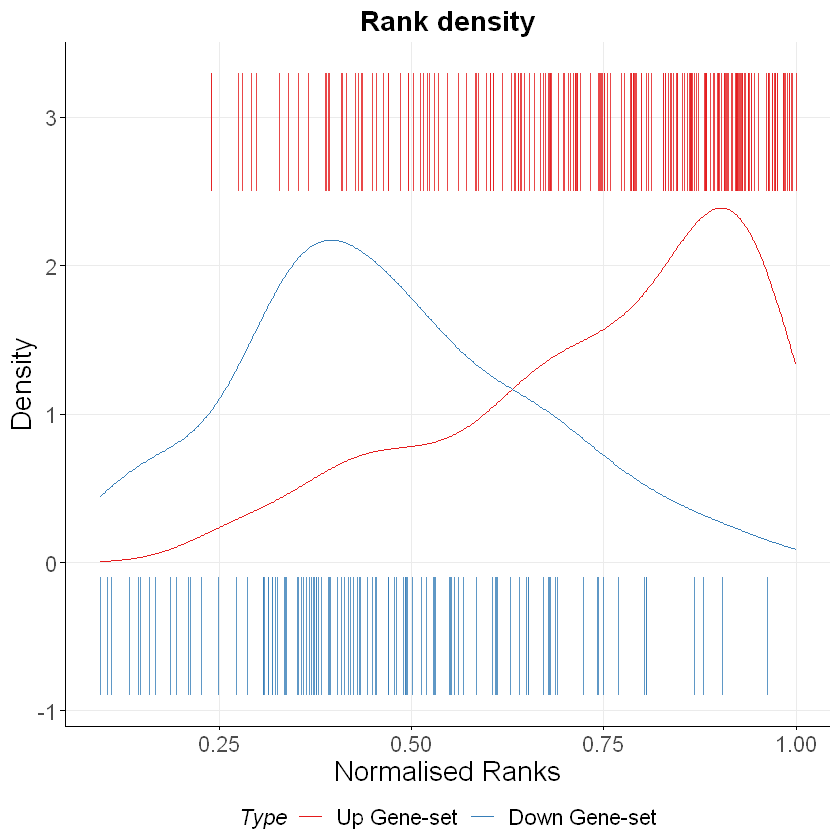

In [9]:
#  You can provide the upSet alone when working with unpaired gene-sets 
# We plot the second sample in rankData, view it by 
head(rankData[, 2, drop = FALSE])
head(rankData[2, , drop = FALSE])

plotRankDensity(rankData[,2,drop = FALSE], upSet = tgfb_gs_up, 
                downSet = tgfb_gs_dn, isInteractive = FALSE)

## Setting `isInteractive = TRUE` generates an interactive plot using the `plotly` package.
## Hovering over the bars in the interactive plot allows you to get information 
## such as the normalised rank (between 0 and 1) and ID of the gene represented by the bar. 
## For the rest of the plotting functions, the isInteractive = TRUE argument has the same behavior.

### 4.2 Plot dispersions of scores

`plotDispersion()`功能函数给总分、上调分数和下调分数画了一张散点图‘score VS. dispersions’。它需要`scoredf`对象的数据框内容以及部分注释来区分不同的点。

[1] "Control" "TGFb"    "Control" "TGFb"    "Control" "TGFb"    "Control"
 [8] "TGFb"    "Control" "Control"

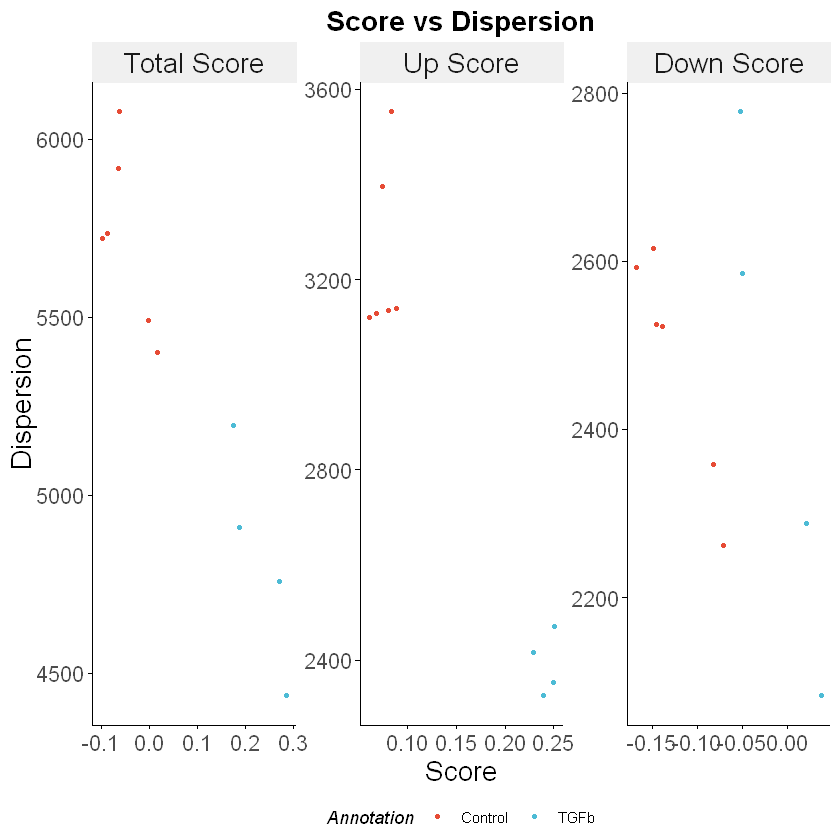

In [10]:
#  Get the annotations of samples by their sample names
tgfbAnnot <- data.frame(SampleID = colnames(tgfb_expr_10_se),
                       Type = NA)
tgfbAnnot$Type[grepl("Ctrl", tgfbAnnot$SampleID)] = "Control"
tgfbAnnot$Type[grepl("TGFb", tgfbAnnot$SampleID)] = "TGFb"

# Sample annotations
tgfbAnnot$Type

plotDispersion(scoredf, annot = tgfbAnnot$Type, isInteractive = FALSE)

# To see an interactive version powered by 'plotly', simply set the 
# 'isInteractive' = TRUE, i.e :
#
# plotDispersion(scoredf,annot = tgfbAnnot$Type,isInteractive = TRUE)

### 4.3 Plot score landscape

`plotScoreLandscape()` plots the scores of the samples against two different gene signatures in a landscape for exploring their relationships.

There are two styles of the landscape plot (i.e scatter and hexBin plot). When the number of samples in the gene expression dataset is above the default threshold (100), plotScoreLandscape generates a hex bin plot otherwise a scatter plot. The threshold can be modified by changing the hexMin.

In order to better demonstrate the usage of plotScoreLandscape, we load some additional datasets consisting of pre-computed scores of larger public datasets. scoredf_ccle_epi and scoredf_ccle_mes are two scored results of a CCLE dataset (Barretina et al. 2012) against an epithelial gene signature and mesenchymal gene signature (Tan et al. 2014) respectively. For details on how to obtain the dataset please see the section at the end of the vignette.

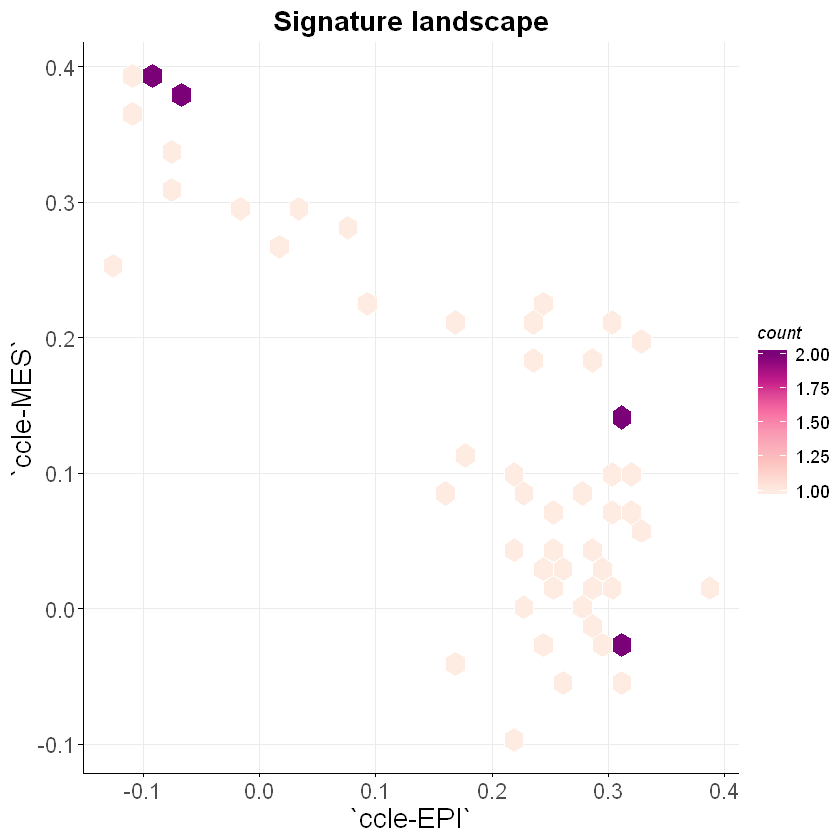

In [11]:
plotScoreLandscape(scoredf_ccle_epi, scoredf_ccle_mes, 
                   scorenames = c('ccle-EPI','ccle-MES'),hexMin = 10)

Similarly, pre-computed scores for the TCGA breast cancer RNA-seq dataset against epithelial and mesenchymal gene signatures are stored in scoredf_tcga_epi and scoredf_tcga_mes respectively (Tan et al. 2014). The utility of this function is enhanced when the number of samples is large.

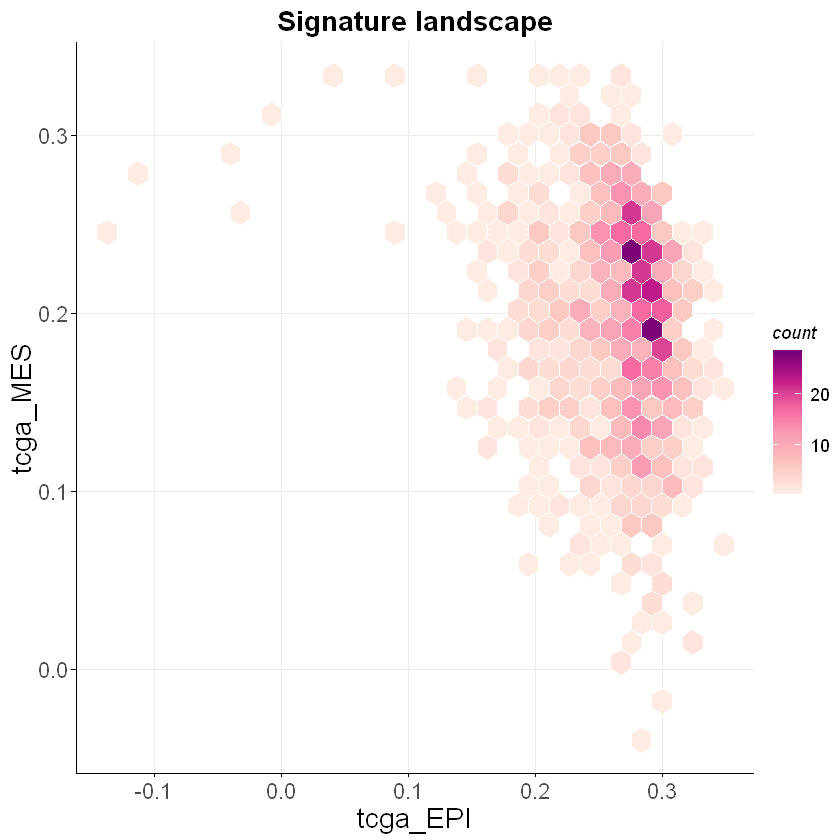

In [12]:
tcgaLandscape <- plotScoreLandscape(scoredf_tcga_epi, scoredf_tcga_mes, 
                   scorenames = c('tcga_EPI','tcga_MES'), isInteractive = FALSE)

tcgaLandscape

You can also project new data points onto the landscape plot generated above by using the projectScoreLandscape function. For example, the plot below overlays 3 CCLE samples onto the TCGA epithelial-mesenchymal landscape. Points are labeled with their sample names by default

Warning message:
"Ignoring unknown aesthetics: text"

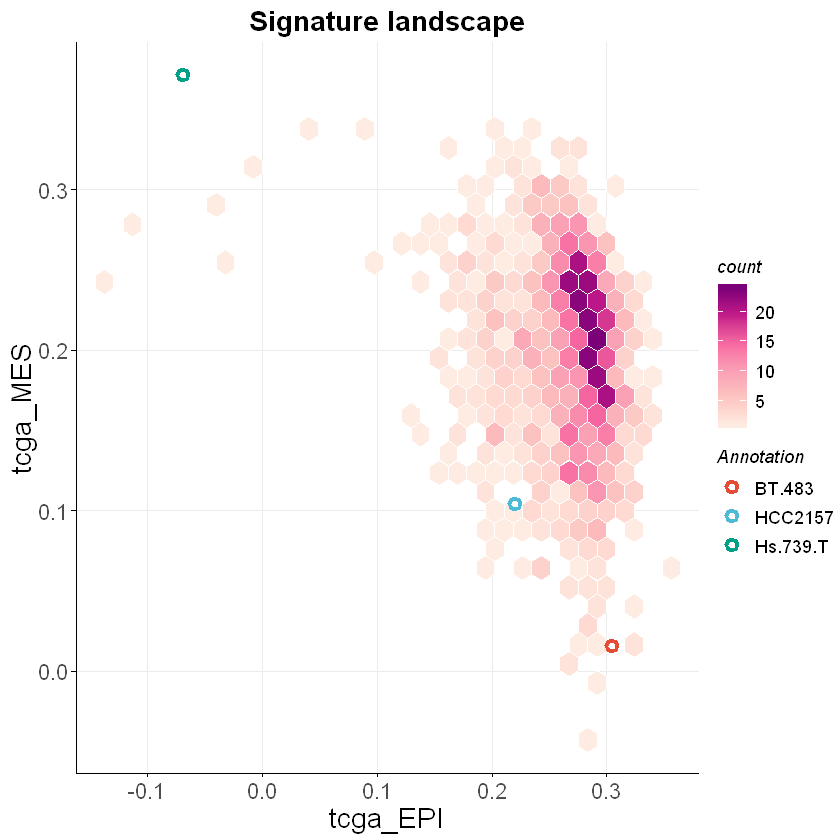

In [13]:
# Project on the above generated 'tcgaLandscape' plot
projectScoreLandscape(plotObj = tcgaLandscape, scoredf_ccle_epi, 
                      scoredf_ccle_mes,
                      subSamples = rownames(scoredf_ccle_epi)[c(1,4,5)],
                      annot = rownames(scoredf_ccle_epi)[c(1,4,5)], 
                      sampleLabels = NULL,
                      isInteractive = FALSE)

Warning message:
"Ignoring unknown aesthetics: text"

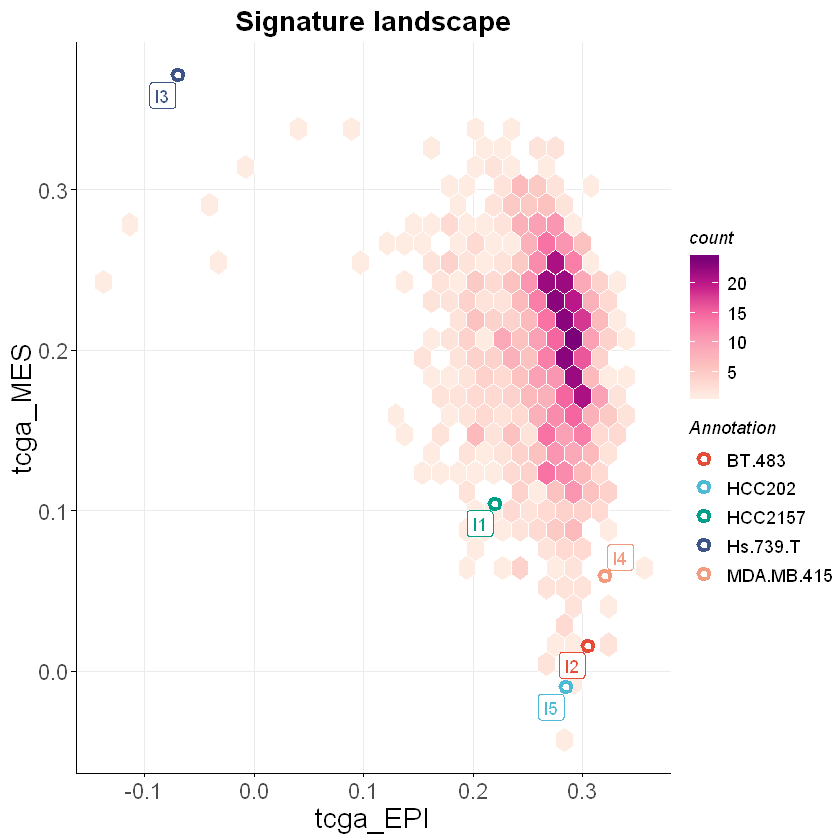

In [14]:
# Custom labels can be provided by passing a character vector to the sampleLabels argument.
projectScoreLandscape(plotObj = tcgaLandscape, scoredf_ccle_epi, scoredf_ccle_mes,
                      subSamples = rownames(scoredf_ccle_epi)[c(1,4,5,8,9)],
                      sampleLabels = c('l1','l2','l3','l4','l5'),
                      annot = rownames(scoredf_ccle_epi)[c(1,4,5,8,9)], 
                      isInteractive = FALSE)

## 5. Estimate empirical p-values for the obtained scores in individual samples and plot null distributions

### 5.1 Permutation test
假设检验<br>
Hypothesis testing of the calculated scores is performed using a permutation test. The null hypothesis is that the gene-set is not enriched in the sample. For each sample, gene labels are randomly shuffled and scores computed against the gene-set. This is done `B` times to generate the null distribution. The `generateNull()` function computes these for multiple samples (n) simultaneously resulting in an `n×B` matrix with permuted scores along the columns for each sample.

The permutation function has parallel computing features provided by using `BiocParallel`.

In [15]:
# tgfb_gs_up : up regulated gene set in the tgfb gene signature
# tgfb_gs_dn : down regulated gene set in the tgfb gene signature

# This permutation function uses BiocParallel::bplapply() parallel function, by 
# supplying the first 5 columns of rankData, we generate Null distribution for 
# the first 5 samples.

# detect how many CPU cores are available for your machine
# parallel::detectCores()

ncores <- parallel::detectCores() - 2 

# Provide the generateNull() function the number of cores you would like
# the function to use by passing the ncore parameter

permuteResult <- generateNull(upSet = tgfb_gs_up, downSet = tgfb_gs_dn, 
                              rankData = rankData[,1:5], centerScore = TRUE,
                              knownDirection = TRUE, B = 1000, ncores = ncores, 
                              seed = 1, useBPPARAM = NULL)
# Note here, the useBPPARAM parameter allows user to supply a BPPARAM variable 
# as a parameter which decides the type of parallel ends to use.
# such as 
# snow <-  BiocParallel::SnowParam(type = "SOCK")
# permuteResult <-  generateNull(upSet = tgfb_gs_up, downSet = tgfb_gs_dn,
# rankData[,1:5],  B = 1000, seed = 1,ncores = ncores, useBPPARAM = snow)

# If you are not sure about this, just leave the value as NULL and set how many
# CPU cores to use via the ncores argument. It will use the default parallel 
# backend for your machine.

# For more information, please see the help page for ?generateNull()
# Please also note that one should pass the same values to the upSet, 
# downSet, centerScore and knownDirection arguments as what they provide 
# for the simpleScore() function to generate a proper null distribution.

head(permuteResult)

D_Ctrl_R1,D_TGFb_R1,D_Ctrl_R2,D_TGFb_R2,Hes_Ctrl_R1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01718855,0.005707284,0.01798685,0.002767871,0.013006266
0.02130207,0.017943832,0.02158246,0.015729994,0.017255527
0.01837595,0.013637389,0.01752377,0.013189854,0.013543794
0.01027262,0.009992019,0.01504365,0.009174445,0.005689081
0.06362106,0.060865232,0.06604272,0.062295300,0.065261197
0.02950583,0.022229053,0.03006665,0.028855037,0.022657682


### 5.2 Estimate empirical p-values估计经验值


[Math Processing Error]-values can be estimated using the getPvals() function by providing the null distributions calculated above. Unless all permutations are exhausted (mostly infeasible), the minimum [Math Processing Error]-value obtained is [Math Processing Error].

In [16]:
pvals <- getPvals(permuteResult,scoredf[1:5,,drop = FALSE])

# getPval returns p-values for each individual sample.
# show the p-values for first 5 samples
pvals

D_Ctrl_R1   D_TGFb_R1   D_Ctrl_R2   D_TGFb_R2 Hes_Ctrl_R1 
      0.993       0.001       0.995       0.001       0.525

### 5.3  Plot null distribution

Plot the null distributions for the first sample with the estimated [Math Processing Error]-value labelled. The function uses the sampleNames parameter to decide which samples to plot.<br>
You can provide multiple sample names to plot these samples in one plot. For example, plot the first 2 samples.

Using  as id variables


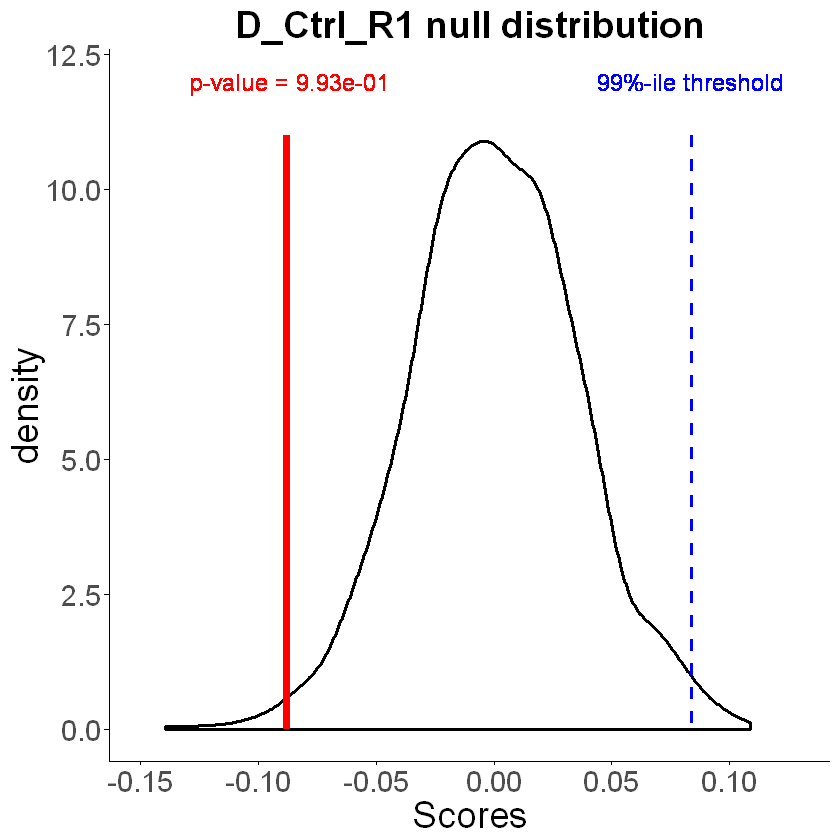

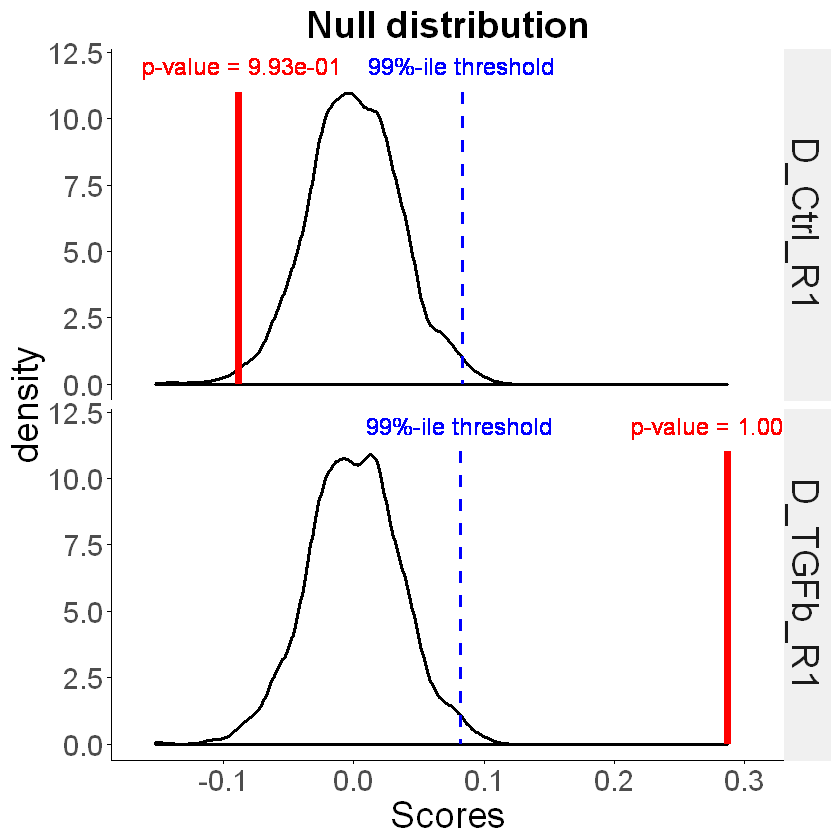

In [17]:
plotNull(permuteResult,scoredf,pvals,sampleNames = names(pvals)[1])


# plot the null distributions for the first 2 samples and the p-values
# We can see from the plot, the control samples are not significant and TGFb 
# samples are very significant with very low p-values
plotNull(permuteResult,scoredf,pvals,sampleNames = names(pvals)[1:2])

## More on the datasets


1. TGFb-EMT data

   In the examples above, we loaded a gene expression matrix data `tgfb_expr_10_se`. This dataset is a ten-sample subset of a full dataset originally from the integrated TGFb-EMT data published by (Foroutan, Cursons, et al. 2017). The full dataset can be accessed here https://figshare.com/articles/comBat_corrected_Foroutan_et_al_2017/5682862. The `tgfb_gs_up` and `tgfb_gs_dn` are the derived up-regulated/down-regulated genes of the TGFb-induced EMT gene signature by (Foroutan, Cursons, et al. 2017) (see Table S1. TGFβ-EMT signature).

2. CCLE dataset

   `scoredf_ccle_epi` and `scoredf_ccle_mes` are two data frames of the pre-computed scores using The Cancer Cell Line Encyclopaedia (CCLE) breast cancer cell line RNA-seq dataset (Barretina et al. 2012). The CCLE dataset was normalised by TPM and can be downloaded from https://www.synapse.org/#!Synapse:syn5612998 Cell lines were scored against the epithelial and mesenchymal gene signatures, which were obtained from (Tan et al. 2014) and can be found in the ‘Table S1B. Generic EMT signature for cell line’ in the supplementary files.

3. TCGA cancer samples dataset

   `scoredf_tcga_epi` and `scoredf_tcga_mes` are two data frames of the pre-computed scores using The Cancer Genome Atlas (TCGA) breast cancer RNA-seq data (RSEM normalised) (The Cancer Genome Atlas Network 2012) against the epithelial and mesenchymal gene signatures respectively. The gene signatures were obtained from (Tan et al. 2014) and can be found in the ‘Table S1A. Generic EMT signature for tumour’. The TCGA dataset was downloaded from The UCSC Cancer Genomics Browser in February 2016 (https://genome-cancer.ucsc.edu)


In [18]:
# preview the scored CCLE samples
head(scoredf_ccle_epi)


# preview the scored TCGA samples
head(scoredf_tcga_epi)

,TotalScore,TotalDispersion
,<dbl>,<dbl>
HCC2157,0.22060031,5926.693
AU565,0.30387843,3884.412
UACC.893,0.30615947,3527.847
BT.483,0.30493150,4158.693
Hs.739.T,-0.06886754,4281.007
HCC2218,0.31230039,3331.402


,TotalScore,TotalDispersion
,<dbl>,<dbl>
TCGA.3C.AAAU.01,0.2722128,3952.612
TCGA.3C.AALI.01,0.3209824,2835.472
TCGA.3C.AALJ.01,0.2531933,4174.260
TCGA.3C.AALK.01,0.3042650,3234.292
TCGA.4H.AAAK.01,0.2682847,4222.445
TCGA.5L.AAT0.01,0.2560761,4132.747


In [13]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17763)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] hexbin_1.27.2        singscore_1.0.0      GSEABase_1.44.0     
 [4] graph_1.60.0         annotate_1.60.0      XML_3.98-1.16       
 [7] AnnotationDbi_1.44.0 IRanges_2.16.0       S4Vectors_0.20.1    
[10] Biobase_2.42.0       BiocGenerics_0.28.0 

loaded via a namespace (and not attached):
 [1] ggrepel_0.8.0               Rcpp_1.0.0                 
 [3] locfit_1.5-9.1              lattice_0.20-38            
 [5] tidyr_0.8.2                 snow_0.4-3                 
 [7] ass